In [1]:
import numpy as np
import pandas as pd
import os
#for dirname, _, filenames in os.walk('‪‪‪‪\\Users\\LENOVO\\risk_factors_cervical_cancer.csv'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
import re
import calendar
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
fname = 'C:\\Users\\LENOVO\\risk_factors_cervical_cancer.csv'
data=pd.read_csv(fname)
data2=data

# Exploratory Data Analysis (EDA)

In [3]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [5]:
#data['Number of sexual partners']=data['Number of sexual partners'].replace('?',100)
#data.replace("[^a-zA-Z0-9.]","-99",regex=True, inplace=True)
#data['Number of sexual partners'] = data.astype(str).astype(floa.astype(int)

**Since missing values are marked by ?, we will replace them by null values to get a better idea about their count**

In [6]:
data.replace('?',-99,inplace=True)
data.replace('.0',"",inplace=True)
data = data.astype(str).astype(float).astype(int)
data.replace(-99,np.nan,inplace=True)

In [7]:
data.dtypes

Age                                     int32
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

**Let's find number of null values now**

In [8]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

**As "STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" have more than 90% of values missing, therefore it would be okay if we remove these columns.**

In [9]:
features_drop=['STDs: Time since first diagnosis','STDs: Time since last diagnosis']
data.drop(features_drop,axis=1, inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


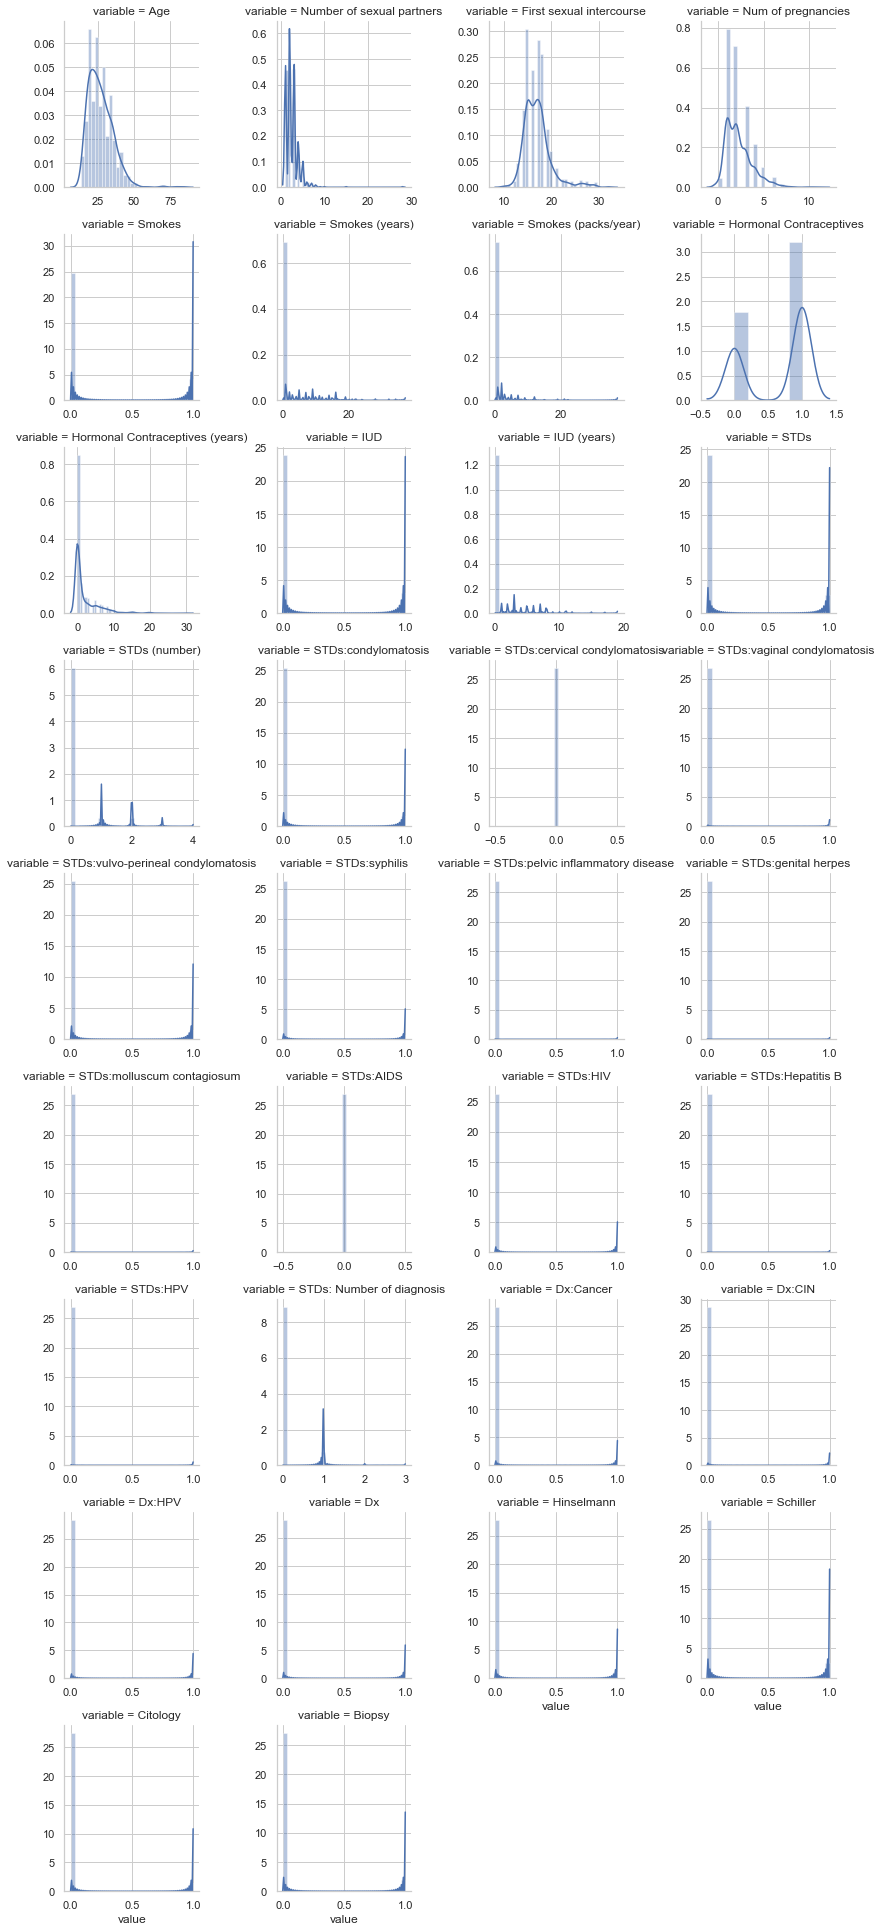

In [10]:
sns.set(style="whitegrid")
num = [f for f in data.columns if ((data.dtypes[f] != 'object')&(data.dtypes[f]!='bool'))]

nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot,'value')

**This is the distribution of integer type variables in the dataset. It clearly shows there are very less examples for cervical cancer patients. Biopsy result along with many other features have a majority of benign cases**

**Age seems to have skewed data. Let's check it**

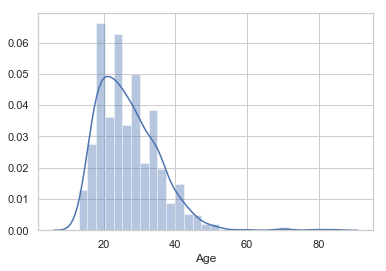

In [11]:
sns.distplot(data['Age'])

**Age is right skewed with hints of outliers. Let us further check it using box plot**

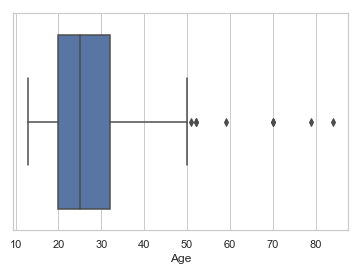

In [12]:
sns.boxplot(x=data['Age'])

**This confirms that age has outliers. Outliers may positively or negatively affect our end results. We will treat them further after further analysis**

In [13]:
#sns.distplot(data['Num of pregnancies'])

**Most of the women have only 1 pregnancy. Out of 850 cases, around 300 of them have 1 pregnancy.**

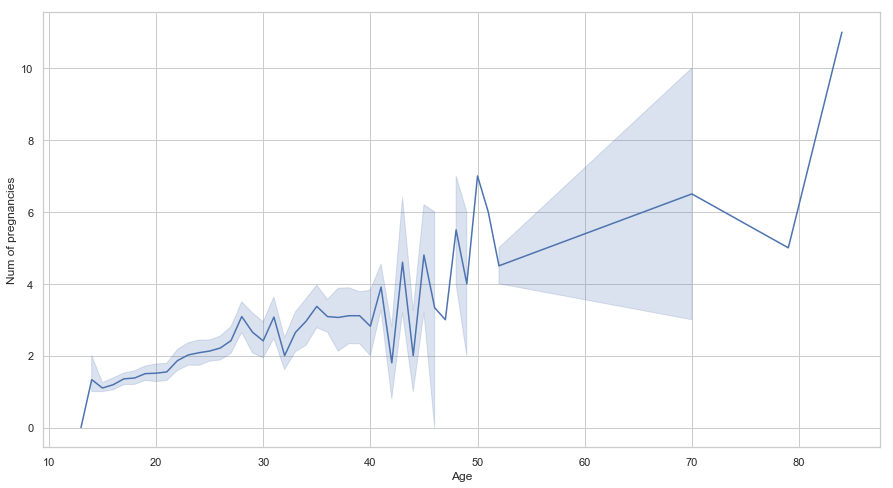

In [14]:
plt.gcf().set_size_inches(15, 8)
sns.lineplot(data['Age'], data['Num of pregnancies'])

**From this graph, it is understandable that with increase in age, the number of pregnancies also increases. However, since the data is skewed when it comes to age, with high number of women lying under the age category of 20-40, it is hard to conclude that number of pregnancies and age are positively co-related.**

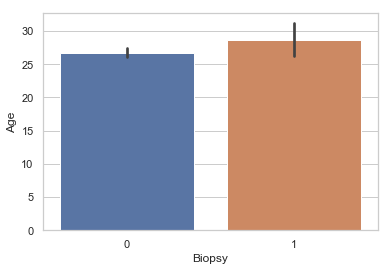

In [15]:
sns.barplot(data['Biopsy'], data['Age'])

**Distribution of 0 and 1 is uneven**

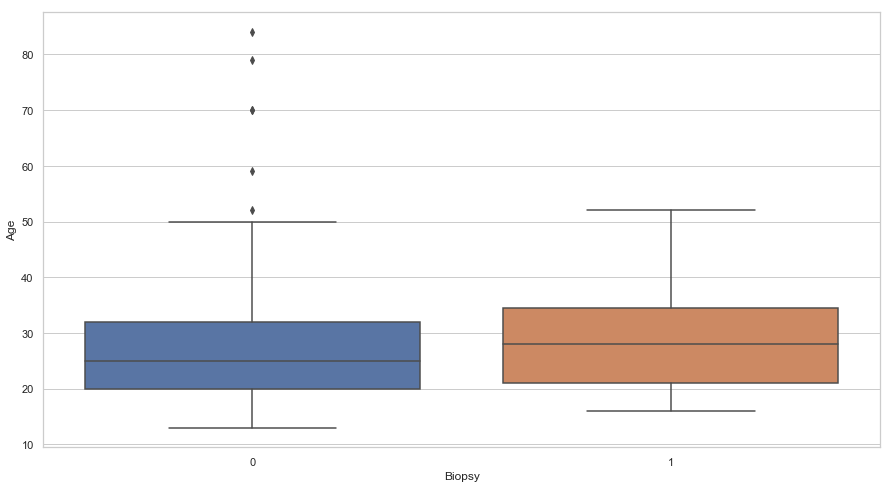

In [16]:
plt.gcf().set_size_inches(15, 8)
sns.boxplot(x=data['Biopsy'], y=data['Age'])

**Again cleary shows there are outliers when it comes to ages. Also, they are specifically in the 0 category of Biopsy.**

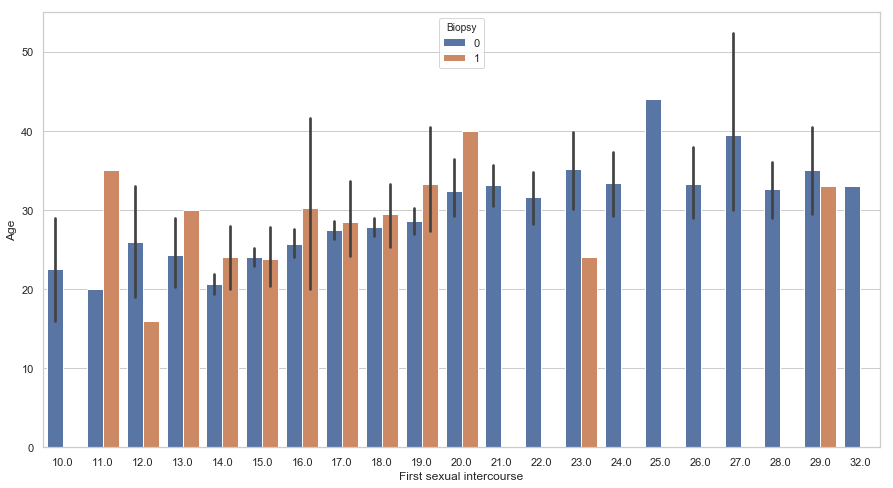

In [17]:
plt.gcf().set_size_inches(15, 8)
sns.barplot(x=data['First sexual intercourse'], y=data['Age'], hue=data['Biopsy'])

**It is visible that women aged 40 having first sexual intercourse at the age of 20 have more number of postive cases of cancer biopsy than any other age group.**

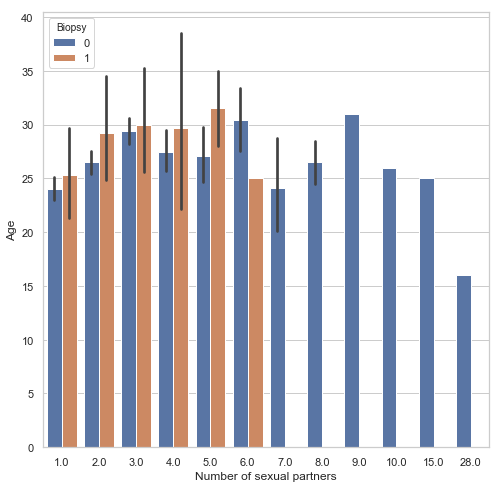

In [18]:
plt.gcf().set_size_inches(8, 8)
sns.barplot(data=data, x="Number of sexual partners", y="Age", hue="Biopsy")

**Filling missing values:**

1. For continuous data, we can use mean/median to fill the missing values. If distribution is skewed, then we will use median to fill the values.
2. For categorical data, we will use mode to fill the missing values.

In [19]:
data['Number of sexual partners']=data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse']=data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Hormonal Contraceptives (years)']=data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())

In [20]:
data['Num of pregnancies']=data['Num of pregnancies'].fillna(data['Num of pregnancies'].mode()[0])
data['Smokes']=data['Smokes'].fillna(data['Smokes'].mode()[0])
data['Smokes (years)']=data['Smokes (years)'].fillna(data['Smokes (years)'].mode()[0])
data['Smokes (packs/year)']=data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].mode()[0])
data['Hormonal Contraceptives']=data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].mode()[0])
data['IUD']=data['IUD'].fillna(data['IUD'].mode()[0])
data['IUD (years)']=data['IUD (years)'].fillna(data['IUD (years)'].mode()[0])
data['STDs']=data['STDs'].fillna(data['STDs'].mode()[0])
data['STDs (number)']=data['STDs (number)'].fillna(data['STDs (number)'].mode()[0])
data['STDs:condylomatosis']=data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].mode()[0])
data['STDs:cervical condylomatosis']=data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].mode()[0])
data['STDs:vaginal condylomatosis']=data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].mode()[0])
data['STDs:vulvo-perineal condylomatosis']=data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].mode()[0])
data['STDs:syphilis']=data['STDs:syphilis'].fillna(data['STDs:syphilis'].mode()[0])
data['STDs:pelvic inflammatory disease']=data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].mode()[0])
data['STDs:genital herpes']=data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].mode()[0])
data['STDs:molluscum contagiosum']=data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].mode()[0])
data['STDs:AIDS']=data['STDs:AIDS'].fillna(data['STDs:AIDS'].mode()[0])
data['STDs:HIV']=data['STDs:HIV'].fillna(data['STDs:HIV'].mode()[0])
data['STDs:Hepatitis B']=data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].mode()[0])
data['STDs:HPV']=data['STDs:HPV'].fillna(data['STDs:HPV'].mode()[0])

In [21]:
data.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [22]:
target = data['Biopsy']
train=data.drop('Biopsy',axis=1)

In [23]:
#pip install imblearn.over_sampling

In [24]:
#applying SMOTE
#from imblearn.over_sampling  import SMOTE
#smk=SMOTE()
#train_new,target_new=smk.fit_resample(train,target)

In [25]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_new, target_new, test_size = 0.30, random_state = 0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.30, random_state = 0)

In [26]:
from vaibhav.Node import Node
from vaibhav.DecisionTree import DecisionTree

In [27]:
X_train2 = X_train.to_numpy()
y_train2 = y_train.to_numpy()
X_test2=X_test.to_numpy()
y_test2=y_test.to_numpy()
clf2 = DecisionTree(max_depth=10)
clf2.fit2(X_train2, y_train2)
print(clf2)
y_pred = clf2.predict(X_test2)

#clf2.generate_dot_graph()

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test2,y_pred) 
precision=precision_score(y_test2,y_pred,average='weighted')
recall=recall_score(y_test2,y_pred,average='weighted')
f1=f1_score(y_test2,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9651162790697675
Precision - 0.9639030692632506
Recall - 0.9651162790697675
F1 - 0.9644541277885662


In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test2, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.43


In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print(classifier)
y_pred=classifier.predict(X_test)
#classifier.generate_dot_graph()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9728682170542635
Precision - 0.9764058395797297
Recall - 0.9728682170542635
F1 - 0.9741880170177077


In [32]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.59


In [33]:
col_names=X_train.columns
col_names
data = data.astype(int)

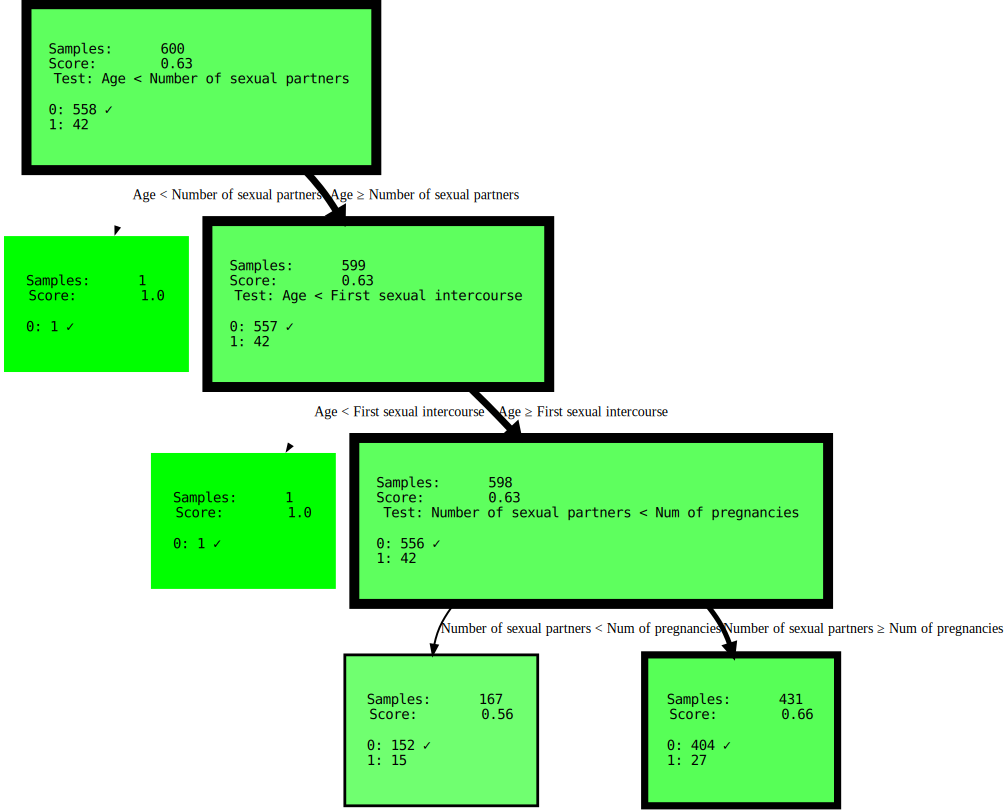

In [34]:
import graphviz
from HDTree import HDTreeClassifier, SmallerThanSplit, EntropyMeasure
hdtree_linear=HDTreeClassifier(allowed_splits=[SmallerThanSplit.build()], information_measure=EntropyMeasure(),
                              attribute_names=col_names,
                              max_levels=3)
hdtree_linear.fit(X_train.values, y_train.values)
hdtree_linear.generate_dot_graph()
hdtree_linear.score(X_train.values, y_train.values)
#print(hdtree_linear)
y_pred=hdtree_linear.predict(X_test.values)
hdtree_linear.generate_dot_graph()

In [35]:
#accuracy=accuracy_score(y_test,y_pred) 
#precision=precision_score(y_test,y_pred,average='weighted')
#recall=recall_score(y_test,y_pred,average='weighted')
#f1=f1_score(y_test,y_pred,average='weighted')

#print('Accuracy - {}'.format(accuracy))
#print('Precision - {}'.format(precision))
#print('Recall - {}'.format(recall))
#print('F1 - {}'.format(f1))

In [36]:
import vaibhav

In [37]:
from vaibhav.DecisionTree import DecisionTree
#X_trial=X_train['Age']
#X_trial2=X_train['Number of sexual partners']
#det = pd.concat([X_trial, X_trial2], join = 'outer', axis = 1)

In [38]:
#from sklearn import datasets
#data = datasets.load_breast_cancer()
#X, y = data.data, data.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
#clf = DecisionTree(max_depth=10)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#print(y_pred)

In [39]:
#X_train